# Wearable Device

data detail

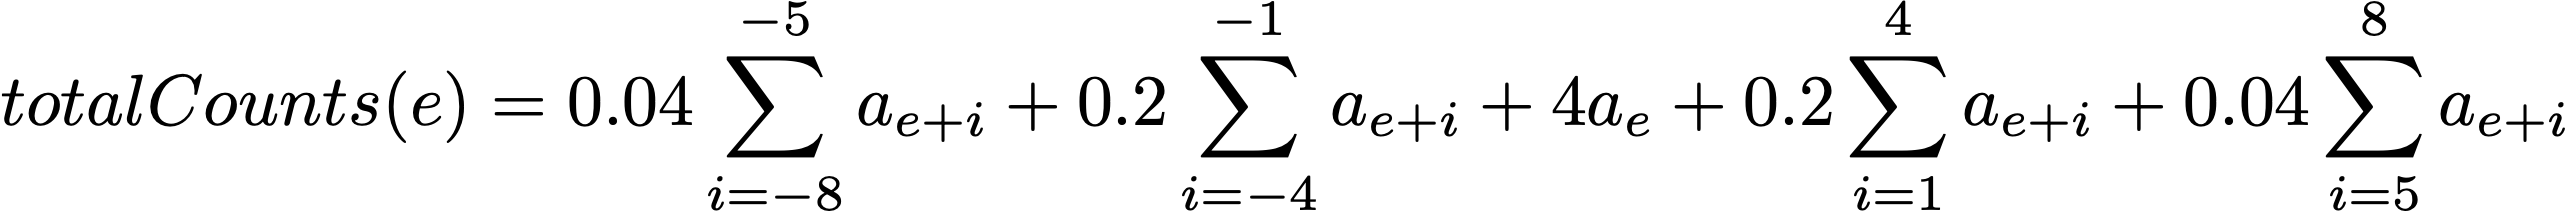

## Data

sleepdataset 27 csv files, containing 4 columns: 
- timestamp
- Actiwatch
- activity counts
- actiware classification (binary 1 = wake, 0 = sleep)

ENMO value calculated from Apple Watch data
Each row corresponds to the data for a 15-second epoch

import numpy
print(numpy.__version__)

import pandas
print(pd.__version__)

pip install --upgrade pandas

pip install ipython --upgrade

pip install numpy --upgrade

In [1]:
import glob
import pandas as pd
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/Users/good/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
filenames = glob.glob('IFN646_project/' + "*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
sleepwake = pd.concat(dfs, ignore_index=True)

In [3]:
sleepwake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49312 entries, 0 to 49311
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  49312 non-null  object 
 1   Actiwatch activity counts  49100 non-null  float64
 2   Actiware classification    48919 non-null  float64
 3   Apple Watch ENMO           49278 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [4]:
sleepwake.head()

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
0,06/01/2000 22:11:00,NaN,NaN,0.047328
1,06/01/2000 22:11:15,91.0,NaN,0.049485
2,06/01/2000 22:11:30,62.0,NaN,0.047339
3,06/01/2000 22:11:45,58.0,NaN,0.069403
4,06/01/2000 22:12:00,154.0,NaN,1.066049


In [5]:
#change timestamp data type
sleepwake['timestamp'] = pd.to_datetime(sleepwake['timestamp'])

In [6]:
sleepwake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49312 entries, 0 to 49311
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  49312 non-null  datetime64[ns]
 1   Actiwatch activity counts  49100 non-null  float64       
 2   Actiware classification    48919 non-null  float64       
 3   Apple Watch ENMO           49278 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [7]:
sleepwake.describe()

,Actiwatch activity counts,Actiware classification,Apple Watch ENMO
count,49100.000000,48919.000000,49278.000000
mean,4.110468,0.079642,0.006621
std,24.561319,0.270741,0.029242
min,0.000000,0.000000,0.000505
25%,0.000000,0.000000,0.001897
50%,0.000000,0.000000,0.003029
75%,0.000000,0.000000,0.004746
max,880.000000,1.000000,3.342039


In [8]:
# rename column name
sleepwake.rename(columns = {'Actiwatch activity counts' : 'actiwatch_counts',
                           'Actiware classification' : 'actiware_class',
                           'Apple Watch ENMO' : 'Apple_ENMO'}, inplace = True)
sleepwake.head()

,timestamp,actiwatch_counts,actiware_class,Apple_ENMO
0,2000-06-01 22:11:00,NaN,NaN,0.047328
1,2000-06-01 22:11:15,91.0,NaN,0.049485
2,2000-06-01 22:11:30,62.0,NaN,0.047339
3,2000-06-01 22:11:45,58.0,NaN,0.069403
4,2000-06-01 22:12:00,154.0,NaN,1.066049


In [9]:
sleepwake = sleepwake[sleepwake['actiware_class'].notna()]
sleepwake = sleepwake[sleepwake['actiwatch_counts'].notna()]
sleepwake = sleepwake[sleepwake['Apple_ENMO'].notna()]

In [10]:
sleepwake.head()

,timestamp,actiwatch_counts,actiware_class,Apple_ENMO
5,2000-06-01 22:12:15,164.0,1.0,0.503060
6,2000-06-01 22:12:30,159.0,1.0,0.117267
7,2000-06-01 22:12:45,94.0,1.0,0.075325
8,2000-06-01 22:13:00,0.0,1.0,0.003893
9,2000-06-01 22:13:15,6.0,1.0,0.006534


In [11]:
sleepwake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48909 entries, 5 to 49300
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         48909 non-null  datetime64[ns]
 1   actiwatch_counts  48909 non-null  float64       
 2   actiware_class    48909 non-null  float64       
 3   Apple_ENMO        48909 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 MB


## Exploratory Analysis

In [12]:
# output = actiware_class
# input = actiwatch_counts / Apple_ENMO

(0.0, 0.05)

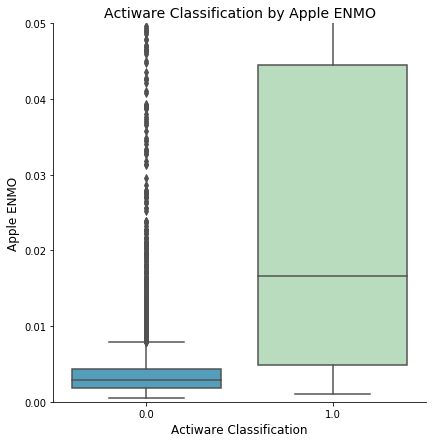

In [13]:
sn.catplot(x="actiware_class", y="Apple_ENMO", kind="box", data=sleepwake
          ,palette="GnBu_r", height=6, aspect=9/9)
plt.title("Actiware Classification by Apple ENMO", fontsize=14)
plt.xlabel("Actiware Classification", fontsize=12)
plt.ylabel("Apple ENMO", fontsize=12) 
plt.ylim(0.0,0.05)

(0.0, 70)

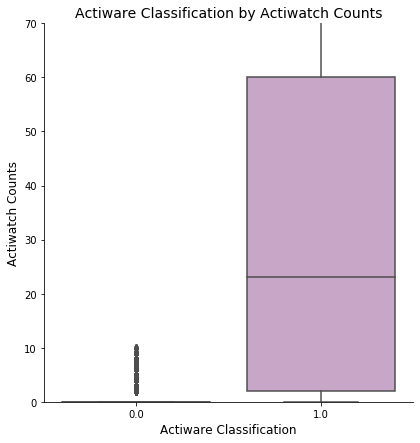

In [14]:
sn.catplot(x="actiware_class", y="actiwatch_counts", kind="box", data=sleepwake
          ,palette="PuRd_r", height=6, aspect=9/9)
plt.title("Actiware Classification by Actiwatch Counts", fontsize=14)
plt.xlabel("Actiware Classification", fontsize=12)
plt.ylabel("Actiwatch Counts", fontsize=12) 
plt.ylim(0.0,70)

### Train Test Split

In [15]:
x = sleepwake[['actiwatch_counts', 'Apple_ENMO']]
y = sleepwake['actiware_class']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=10)

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 100)
randomforest_model = randomforest.fit(x_train[['Apple_ENMO']], y_train)
y_predicted_r = randomforest.predict(x_test[['Apple_ENMO']])

randomforest_ac = RandomForestClassifier(n_estimators = 100)
randomforest_model_ac = randomforest_ac.fit(x_train[['actiwatch_counts']], y_train)
y_predicted_r_ac = randomforest_ac.predict(x_test[['actiwatch_counts']])

In [18]:
print("Train accuracy:", randomforest.score(x_train[['Apple_ENMO']], y_train))

Train accuracy: 0.982124079915878


In [19]:
print("Test accuracy:", randomforest.score(x_test[['Apple_ENMO']], y_test))

Test accuracy: 0.9424793839024058


In [20]:
print("Train accuracy:", randomforest_ac.score(x_train[['actiwatch_counts']], y_train))

Train accuracy: 0.9740039724266853


In [21]:
print("Test accuracy:", randomforest_ac.score(x_test[['actiwatch_counts']], y_test))

Test accuracy: 0.9750562257207115


In [22]:
# k-fold cross validation to evaluate the performance of the model
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = randomforest, X = x_train, y = y_train, cv =10)
accuracy.mean()

0.9623497144113078

In [23]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predicted_r)
cnf_matrix

array([[13174,   364],
       [  480,   655]])

In [24]:
cnf_matrix_ac = metrics.confusion_matrix(y_test, y_predicted_r_ac)
cnf_matrix_ac

array([[13513,    25],
       [  341,   794]])

In [25]:
from sklearn.metrics import plot_confusion_matrix

In [26]:
def eval_model(model, x_train, y_train, x_test, y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = plot_confusion_matrix(model, x_train, y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(x_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == y_train)/len(y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = plot_confusion_matrix(model, x_test, y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(x_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == y_test)/len(y_test)));


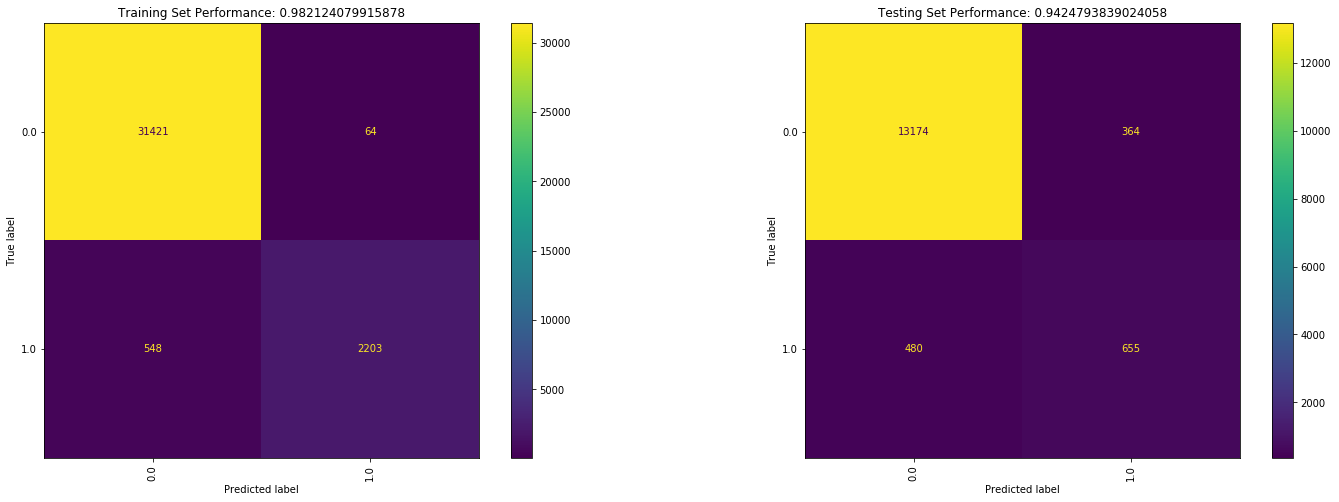

In [27]:
eval_model(randomforest, x_train[['Apple_ENMO']], y_train, x_test[['Apple_ENMO']], y_test)

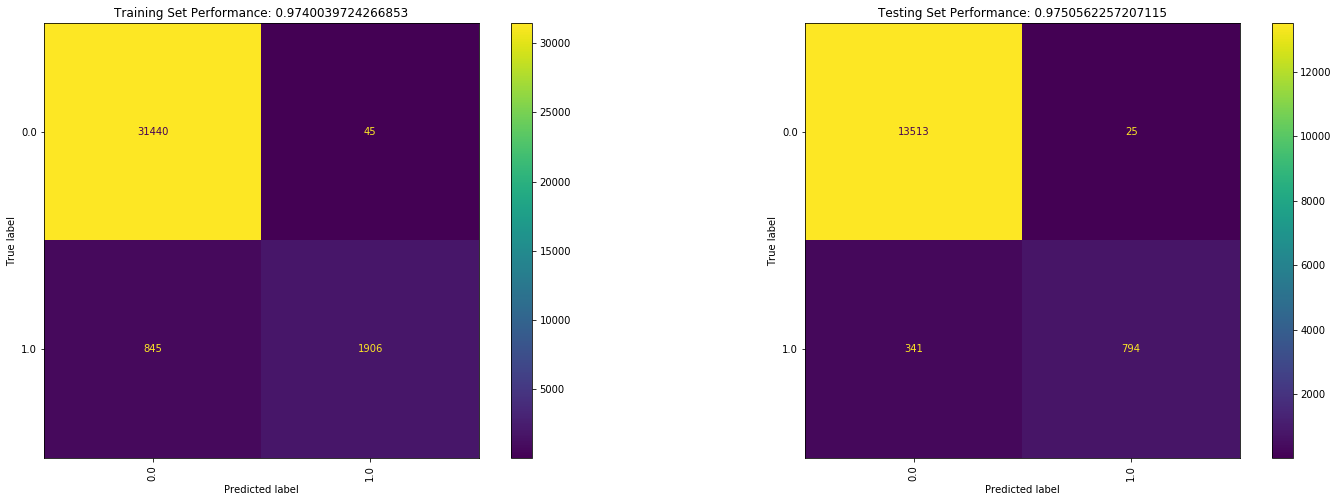

In [28]:
eval_model(randomforest_ac, x_train[['actiwatch_counts']], y_train,
           x_test[['actiwatch_counts']], y_test)

Text(0.5, 1.0, 'DET Curve')

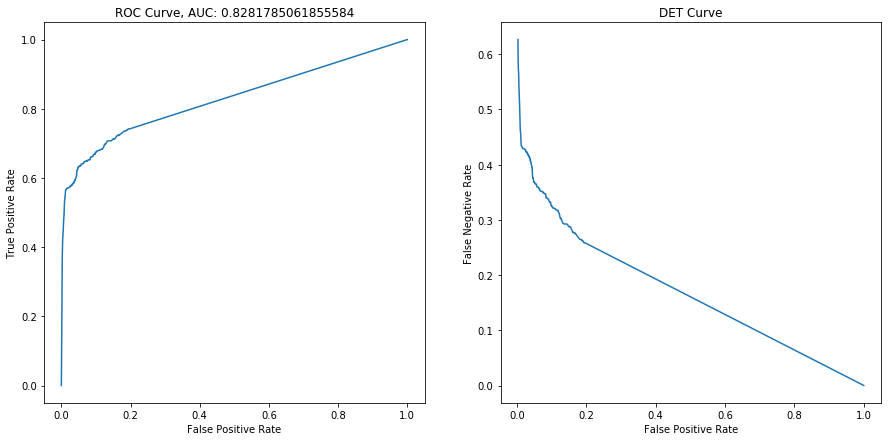

In [29]:
from sklearn.metrics import roc_curve, det_curve, roc_auc_score, auc

scores = randomforest.predict_proba(x_test[['Apple_ENMO']])

fig = plt.figure(figsize=[15, 7])
fpr, tpr, thresholds = roc_curve(y_test, scores[:, 1])
auc_score = roc_auc_score(y_test, scores[:, 1])
ax = fig.add_subplot(1, 2, 1)
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve, AUC: ' + str(auc_score))

fpr, fnr, thresholds = det_curve(y_test, scores[:, 1])
ax = fig.add_subplot(1, 2, 2)
ax.plot(fpr, fnr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('False Negative Rate')
ax.set_title('DET Curve')

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(y_test, randomforest.predict(x_test[['Apple_ENMO']])))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     13538
         1.0       0.64      0.58      0.61      1135

    accuracy                           0.94     14673
   macro avg       0.80      0.78      0.79     14673
weighted avg       0.94      0.94      0.94     14673



In [31]:
print(classification_report(y_test, randomforest_ac.predict(x_test[['actiwatch_counts']])))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     13538
         1.0       0.97      0.70      0.81      1135

    accuracy                           0.98     14673
   macro avg       0.97      0.85      0.90     14673
weighted avg       0.97      0.98      0.97     14673



In [32]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(randomforest, x_train[['Apple_ENMO']], y_train, cv=10)))

0.9397127236451602


In [33]:
print(np.mean(cross_val_score(randomforest_ac, x_train[['actiwatch_counts']], y_train, cv=10)))

0.9738581059681485
